
<h1 id="实验二：回归模型">实验二：回归模型<a class="anchor-link" href="#实验二：回归模型">¶</a></h1>



<ul>
<li>回归是监督学习的一个重要问题，回归用于预测<strong>输入变量</strong>和<strong>输出变量</strong>之间的关系，特别是当输入变量的值发生变化时，输出变量的值也随之发生变化。</li>
<li>回归模型是一种表示从输入变量到输出变量之间映射的函数</li>
<li>对连续值的预测</li>
<li>可以用合适的曲线揭示样本点随着自变量的变化关系</li>
</ul>



<h2 id="实验要求">实验要求<a class="anchor-link" href="#实验要求">¶</a></h2><h3 id="截止日期：10月21日">截止日期：10月21日<a class="anchor-link" href="#截止日期：10月21日">¶</a></h3><p>作业的提交格式参考之前的说明，提交到2120220594@nankai.edu.cn</p>
<h3 id="基本要求">基本要求<a class="anchor-link" href="#基本要求">¶</a></h3><p>将数据集winequality-white.csv按照4:1划分为训练集和测试集。</p>
<ol>
<li>构造线性回归模型，并采用批量梯度下降<strong>和</strong>随机梯度下降进行优化；输出训练集和测试集的均方误差（MSE），画出MSE收敛曲线。</li>
<li>对于批量梯度下降<strong>和</strong>随机梯度下降，采用不同的学习率并进行MSE曲线展示，分析选择最佳的学习率。</li>
</ol>
<p>特别需要注意：</p>
<ul>
<li>划分数据集时尽可能保持数据分布的一致性，保持样本类别比例相似，可采用分层采样的方式。</li>
<li>需要对数据集进行一定的预处理</li>
</ul>
<h3 id="中级要求">中级要求<a class="anchor-link" href="#中级要求">¶</a></h3><p>探究回归模型在机器学习和统计学上的差异。</p>
<ul>
<li>回归模型在机器学习领域和统计学领域中都十分常用，而且使用方法也相似，但其实际的含义具有本质的区别。我们希望同学们从回归模型的角度更加充分地理解机器学习和统计学的区别。
<img alt="image.png" src="https://s2.loli.net/2022/10/04/Np71slqWZEfGwMC.png"/></li>
</ul>
<h3 id="高级要求">高级要求<a class="anchor-link" href="#高级要求">¶</a></h3><p>编程实现岭回归算法，求解训练样本的岭回归模型，平均训练误差和平均测试误差（解析法、批量梯度下降法和随机梯度下降法<strong>均可</strong>）。</p>



<h2 id="线性回归">线性回归<a class="anchor-link" href="#线性回归">¶</a></h2>



<p>线性回归模型(Linear Regression)，因为结构简单，可解释性好，实现简单，在工程领域得到广泛应用。</p>
<p>首先对线性函数进行简单的回顾：</p>



<p><img alt="a.png" src="https://s2.loli.net/2022/10/04/rdm5WLI84BNznUR.png"/></p>



<h3 id="预测模型">预测模型<a class="anchor-link" href="#预测模型">¶</a></h3>



<p>首先，我们明确几个常用的数学符号：</p>
<ul>
<li>特征 (features): $x_i$, 比如房屋的面积，卧室的数量都可以是房屋的特征</li>
<li>特征向量 (输入): $x$, 若干个特征组成的向量，代表一套房屋的所有信息。例如，$x^{(i)}_j$ 表示第 $i$ 套房的第 $j$ 个特征</li>
<li>输出向量 $y$, $y^{(i)}$ 表示第 $i$ 个输入对应的输出</li>
<li>假设 (hypothesis): 也称预测函数，比如一个线性的预测函数是：
$$h_\theta (x)=\theta_0+\theta_1x_1+\theta_2x_2+...+\theta_nx_n=\theta^T x$$
上述的表达式就是<strong>回归方程 (regression equation)</strong>, $\theta$ 就是回归系数，关系到我们预测的准确程度</li>
</ul>



<h2 id="一元线性回归-vs.-多元线性回归">一元线性回归 vs. 多元线性回归<a class="anchor-link" href="#一元线性回归-vs.-多元线性回归">¶</a></h2>



<p>假设一共有N个特征向量，对于多元线性回归有m个特征：</p>
<ul>
<li>数据集：<ul>
<li>一元：$\{(x^{(i)}, y^{(i)})\}$  </li>
<li>多元：$\{(\pmb{x}^{(i)}, y^{(i)})\},\\ \pmb{x}^{(i)}=[x^{(i)}_1, x^{(i)}_2,..., x^{(i)}_m], i=1,2,...,N$</li>
</ul>
</li>
</ul>
<ul>
<li><p>假设：</p>
<ul>
<li>一元：$f(x^{(i)},\pmb{\theta})=\theta_0+\theta_1x^{(i)}$ </li>
<li>多元：$f(\pmb{x}^{(i)},\pmb{\theta})=\theta_0+\theta_1x^{(i)}_1+\theta_2x^{(i)}_2 + ... +\theta_mx^{(i)}_m $</li>
</ul>
</li>
<li><p>参数：</p>
<ul>
<li>一元：$\pmb{\theta}=[\theta_0, \theta_1]$</li>
<li>多元：$\pmb{\theta}=[\theta_0, \theta_1,\theta_2, ...,\theta_m]$</li>
</ul>
</li>
<li><p>损失函数：</p>
<ul>
<li>MSE：$$Loss=\frac{1}{N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$
有的资料上损失函数多了个$\frac{1}{2}$：
$$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2$$
目的是求导后将二次项的系数变为1，加和不加对结果理论上没有影响。</li>
</ul>
</li>
<li><p>目标：损失函数最小</p>
</li>
<li><p>解析解：</p>
<ul>
<li><p>一元：分别对MSE中的$\theta_0, \theta_1$求偏导</p>
</li>
<li><p>多元：对MSE中的$\pmb{\theta}$求偏导
$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$</p>
</li>
</ul>
</li>
</ul>



<h3 id="优化方法">优化方法<a class="anchor-link" href="#优化方法">¶</a></h3><ul>
<li><p>直接求解析解：$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$</p>
<ul>
<li><p>优点：不需要试错，可以直接取得最小值，比较快捷。</p>
</li>
<li><p>缺点：当特征过于复杂时，无法求逆。</p>
</li>
<li><p>适用于：小数据场景。（梯度下降相对用的更多一些）</p>
</li>
</ul>
</li>
<li>梯度下降法</li>
<li>岭回归</li>
</ul>



<h3 id="梯度下降法">梯度下降法<a class="anchor-link" href="#梯度下降法">¶</a></h3>



<p><img alt="image.png" src="https://s2.loli.net/2022/10/04/XOjpPcdCksRwQn8.png"/></p>



<h3 id="学习率">学习率<a class="anchor-link" href="#学习率">¶</a></h3>



<p><img alt="image.png" src="https://s2.loli.net/2022/10/04/OfuUjWLSJF3qyso.png"/></p>



<h3 id="批量梯度下降">批量梯度下降<a class="anchor-link" href="#批量梯度下降">¶</a></h3><p>批量梯度下降法为最小化所有训练样本的损失函数，使得最终求解的是全局的最优解。</p>



<p><img alt="image.png" src="https://s2.loli.net/2022/10/04/TB4DmndiJ9OVPYk.png"/></p>



<p>虽然批量梯度下降能够收敛到最小值，但每调节一个$\theta_j$都必须遍历一遍样本集，如果样本的体积m很大，那么这种算法开销巨大，但由于其向量表示，可以利用并行计算优化性能。</p>



<h3 id="随机梯度下降">随机梯度下降<a class="anchor-link" href="#随机梯度下降">¶</a></h3>



<p><img alt="image.png" src="https://s2.loli.net/2022/10/04/u6YUkgCxZ7s48ft.png"/></p>



<h3 id="岭回归">岭回归<a class="anchor-link" href="#岭回归">¶</a></h3>



<p>公式$\pmb{\theta}=(\pmb{x}^T\pmb{x})^{-1}\pmb{x}^Ty$不可逆原因:</p>
<ul>
<li>矩阵可逆的充要条件：满秩；</li>
<li>存在噪声维，使得特征间存在线性关系，导致矩阵的秩小于特征维度；</li>
<li>特征数比样本还多的时候，方程的个数比未知数的个数还要少，所以会导致矩阵的秩小于样本数,无穷多解满足该情况，进而矩阵不可逆。</li>
</ul>



<p>为了解决这个问题，岭回归在最小二乘估计的基础上增加了一项，即岭回归估计：
$$\pmb{\theta}=(\pmb{x}^T\pmb{x}+\lambda\pmb{I})^{-1}\pmb{x}^Ty$$</p>



<p>而岭回归模型的目标函数在线性模型的基础上加了L2范数的惩罚项：
$$Loss=\frac{1}{2N}\sum_{i=1}^N(y^{(i)}-f(\pmb{x}^{(i)},\pmb{\theta}))^2+\lambda \sum_{j=0}^N\theta_j^2$$
当岭参数$\lambda$时，得到最小二乘解，当岭参数$\lambda$趋向更大时，岭回归系数 $\pmb{\theta}$ 估计趋向于0。
从岭回归的原理可以知道，岭回归就是改良后的最小二乘估计法，通过放弃最小二乘法的无偏性，通过损失部分特征信息，降低模型精度来得到更符合实际情况的回归系数。</p>



<h3 id="winequality-white数据集">winequality-white数据集<a class="anchor-link" href="#winequality-white数据集">¶</a></h3>


In [30]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("winequality-white.csv")
data



,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7



<p>最后一列是质量的评级，前面其他的都是酒的特征</p>



<h3 id="对数据集进行预处理">对数据集进行预处理<a class="anchor-link" href="#对数据集进行预处理">¶</a></h3><p>对数据集的预处理是一个十分重要的步骤，能够使不同量纲的特征处于同一数值量级，减少方差大的特征的影响，使模型更准确，并加快学习算法的收敛速度。</p>
<p>常用的预处理方法有：标准化、归一化和中心化。同学们根据需要从中选择一种或几种方法进行预处理（采用其他方法亦可）。</p>



<p><img alt="image.png" src="https://s2.loli.net/2022/10/04/WqxB76cXLGtePSK.png"/></p>


In [31]:
def MSE(X, Y, W_init): #这个function是计算loss function的值， J(theta)公式
    m = Y.shape[0]
    # cost = 0
    inner = np.power(((X.dot(W_init)).iloc[:,0]-Y.iloc[:,0]),2)
    term = np.sum(inner)/(2*m)
    # cost = cost/(2*float(m))
    return term

In [32]:
# 数据预处理
# 初始化回归系数
def Normalization_fun(x):
    # 特征零均值
    x = (x - np.mean(x, 0)) / (np.max(x, 0) - np.min(x, 0))
    return x

# 提取特征和标签
X = data.iloc[:, 0:-1]  # N D
X = Normalization_fun(X)
Y = data.iloc[:, -1]
Y=pd.DataFrame(Y)
data0 = pd.concat([pd.DataFrame(np.ones(X.shape[0]), columns=['x0']), X], axis=1)
W_init = np.random.randn(data0.shape[1], 1)

In [33]:
#分层 随机 选取训练样本
def sample_split(data, train_ratio=0.8, label='quality', seed=None):
    test=None

    # 根据标签分组，便于分层抽样
    train = data.groupby(label).apply(lambda x: x.sample(frac=train_ratio, random_state=seed))
    
    # 将train每行索引存入列表，为了找到在data中对应的行，删除得到test数据集
    index=[]
    for i in range(0,train.shape[0]):
        index.append((train.iloc[i].name)[1])
    test=data.drop(index=index)
    
    # 将训练集打乱顺序
    train = train.sample(frac=1, random_state=seed)
    train.reset_index(drop=True, inplace=True)
    test.reset_index(drop=True, inplace=True)
    
    return train, test



In [34]:
from sklearn.model_selection import StratifiedShuffleSplit
# 批量梯度下降

def bgd(x,init_w,y,iter_size,lr):
    # 划分测试集，以分层采样
    # split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
    data=pd.concat([x,y],axis=1)
    # for train_index,test_index in split.split(data.iloc[:,:],data.iloc[:,-1]):
    #     train_set = data.iloc[train_index,:]
    #     test_set = data.iloc[test_index,:]
    train_set,test_set=sample_split(data)
    train_X=train_set.iloc[:,0:-1]
    train_Y=pd.DataFrame(train_set.iloc[:,-1])
    test_X=test_set.iloc[:,0:-1]
    test_Y=pd.DataFrame(test_set.iloc[:,-1])

    cost=[]
    test_cost=[]
    w = init_w
    m = x.shape[0]
    for i in range(iter_size):
        
        predict = train_X.dot(w) # predict:(data_num,1)
        # x:(data_num,weight_num) x.T:(weight_num,data_num) y-predit:(data_num,1)
        # grad:(weight_num,1)
        grad = train_X.T.dot((predict.iloc[:,0] - train_Y.iloc[:,0])) / m * lr
        for i in range(w.shape[0]):
            w[i][0]-=grad[i]
        cost.append(MSE(train_X,train_Y,w))
        test_cost.append(MSE(test_X,test_Y,w))
        
        # w -= grad 
    # print(w)
    return w,cost,test_cost

In [35]:
w,cost,test_cost=bgd(data0,W_init,Y,500,0.01)

Text(0.5, 1.0, 'cost vs. iters')

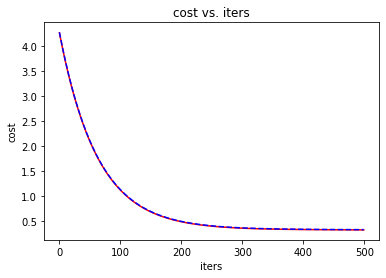

In [36]:
fig, axes = plt.subplots()
axes.plot(np.arange(len(cost)), cost, 'r')
axes.plot(np.arange(len(test_cost)), test_cost, 'b',linestyle='--')
axes.set_xlabel('iters')
axes.set_ylabel('cost')
axes.set_title('cost vs. iters')
# fig.savefig('p2.png')

In [37]:
## TODO：随机梯度下降
 
# 定义随机梯度下降函数：
def stochastic_gradient_descent(X,y,theta,alpha,epoch):
    
    # 划分测试集，以分层采样
    # split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
    data=pd.concat([X,y],axis=1)
    # for train_index,test_index in split.split(data.iloc[:,:],data.iloc[:,-1]):
    #     train_set = data.iloc[train_index,:]
    #     test_set = data.iloc[test_index,:]
    train_set,test_set=sample_split(data)
    train_X=train_set.iloc[:,0:-1]
    train_Y=pd.DataFrame(train_set.iloc[:,-1])
    test_X=test_set.iloc[:,0:-1]
    test_Y=pd.DataFrame(test_set.iloc[:,-1])
    avg_cost=[]
    avg_testcost=[]
    i=0
    for k in range(epoch):
        if i< train_X.shape[0]:
            error = train_X.iloc[i:i+1].dot(theta).iloc[0,0]-train_Y.iloc[i,0]
        
            for j in range(theta.shape[0]):
                theta[j,0] -= alpha*error*train_X.iloc[i:i+1,j]
            i+=1
            # theta = temp
        avg_cost.append(MSE(train_X,train_Y,theta))
        avg_testcost.append(MSE(test_X,test_Y,theta))
        # print(k)
        
    return theta,avg_cost,avg_testcost

In [38]:
alpha = 0.01
epoch = 500
# theta = np.matrix(np.array([0,0]))
# 初始化回归系数
W_raninit = np.random.randn(data0.shape[1], 1)
 
# 调用随机梯度下降函数来计算线性回归中的theat参数：
g,avg_cost,avg_testcost = stochastic_gradient_descent(data0,Y,W_raninit,alpha,epoch)

Text(0.5, 1.0, 'cost vs. iters')

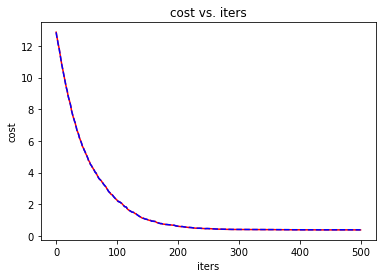

In [39]:
fig, axes = plt.subplots()
axes.plot(np.arange(len(avg_cost)), avg_cost, 'r')
axes.plot(np.arange(len(avg_testcost)), avg_testcost, 'b',linestyle='--')
axes.set_xlabel('iters')
axes.set_ylabel('cost')
axes.set_title('cost vs. iters')
# fig.savefig('p2.png')

In [40]:
# 采用不同学习率
lr=[0.001,0.003,0.01,0.03,0.1,0.3]
err1=[]
err2=[]
for i in lr:
    W_init = np.random.randn(data0.shape[1], 1)
    w,cost,test_cost=bgd(data0,W_init,Y,300,i)
    err1.append(cost[299]+test_cost[299])
    
    W_init = np.random.randn(data0.shape[1], 1)
    g,avg_cost,avg_testcost = stochastic_gradient_descent(data0,Y,W_init,i,300)
    err2.append(avg_cost[299]+avg_testcost[299])
    

Text(0.5, 1.0, 'cost vs. lr')

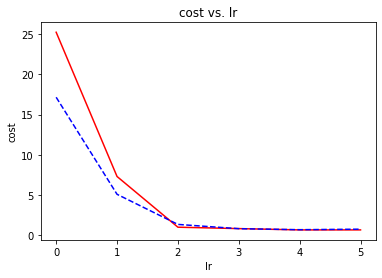

In [41]:
fig, axes = plt.subplots()
axes.plot(np.arange(len(err1)), err1 ,'r')
axes.plot(np.arange(len(err2)), err2, 'b',linestyle='--')
axes.set_xlabel('lr')
axes.set_ylabel('cost')
axes.set_title('cost vs. lr')
# fig.savefig('p2.png')

这个误差只计算了在迭代最后一次是的训练集和测试集误差，从图中可以看到在学习率为0.01及之后，误差开始变小

# 回归模型在机器学习和统计学上的差异
关于机器学习与统计学之间的差异，目前流行的一种说法是，机器学习和统计学之间的主要区别在于它们的目的：机器学习模型旨在使最准确的预测成为可能；统计模型被设计用于推断变量之间的关系。

回归模型是一种统计方法，我们训练回归量并获得与统计回归模型相同的结果，旨在最小化数据点之间的平方误差。在一个案例中，我们做了“训练”模型的事情，其中涉及使用数据的一个子集。我们不知道模型将如何执行，直到在训练期间能够“测试”出此数据不存在的、被称为测试集的其他数据。在这种情况下，机器学习的目的是在测试集上获得最佳性能。对于统计模型，我们只要找出可以最小化所有数据的均方误差（假设数据是一个线性回归量，加上一些随机噪声，本质上通常是高斯噪声），无需训练，也无需测试。

（受监督的）机器学习的目的是获得可以进行可重复预测的模型。我们通常不关心模型是否可解释，机器学习只看重结果。而统计建模更多的是发现变量之间的关系和这些关系的重要性，同时也适合预测。

没有统计学就不会存在机器学习，但机器学习在当代非常有用，因为自信息爆炸以来人类，已经产生了大量数据。

在“到底应该选择机器学习还是统计模型”的问题上，很大程度上取决于目的是什么。如果只是想创建一种能够高精度地预测住房价格的算法，或者使用数据来确定某人是否可能感染某些类型的疾病，那么机器学习可能是更好的方法；如果试图证明变量之间的关系或从数据推断，统计模型可能是更好的方法。


<p><img alt="image.png" src="https://pic1.zhimg.com/80/v2-22fd66690e238a44e9447e91377e9d04_720w.webp"/></p>




In [42]:
# 岭回归
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge
from sklearn.metrics import mean_squared_error
def ridge(X,Y):
    # 数据分割处理
    # split = StratifiedShuffleSplit(n_splits = 1,test_size = 0.2,random_state = 42)
    data=pd.concat([X,Y],axis=1)
    # for train_index,test_index in split.split(data.iloc[:,:],data.iloc[:,-1]):
    #     train_set = data.iloc[train_index,:]
    #     test_set = data.iloc[test_index,:]
    train_set,test_set=sample_split(data)
    train_X=train_set.iloc[:,0:-1]
    train_Y=pd.DataFrame(train_set.iloc[:,-1])
    test_X=test_set.iloc[:,0:-1]
    test_Y=pd.DataFrame(test_set.iloc[:,-1])
    #预估器
    estimator=Ridge()
    estimator.fit(train_X,train_Y)
    #得出模型
    print('bias:',estimator.intercept_)
    print('coef:',estimator.coef_)
    # print('bias:',estimator.intercept_)
    #模型评估
    y_predict=estimator.predict(test_X)
    # print('预测房价:',y_predict)
    error=mean_squared_error(test_Y,y_predict)
    print('均方误差：',error)

In [43]:
ridge(data0,Y)

bias: [5.88291309]
coef: [[ 0.         -0.36118669 -2.0234192  -0.07339912  2.32948792 -0.33975663
   1.18449506 -0.15806119 -1.71904307  0.28333539  0.37509198  1.98211076]]
均方误差： 0.5806466884265298
